#### CNN 모델
- 특징 추출 부분 + 분류 부분
- Convolution Layer + Dense Layer

In [142]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, Input
from tensorflow.keras.datasets.fashion_mnist import load_data


import numpy as np
import matplotlib.pyplot as plt

[1] 데이터 준비

In [143]:
(X_train, y_train), (X_test, y_test) = load_data()

In [144]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [145]:
X_test[0].shape

(28, 28)

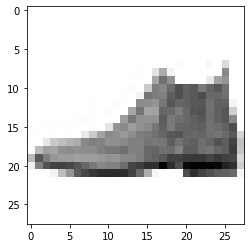

In [146]:
plt.imshow(X_test[0], cmap='binary')
plt.show()

[2] 모델 생성

[2-1] 모델 설계
- 데이터셋 : 이미지 데이터셋, 흑백이미지 ==> 채널 1
- Conv2D + Dense

✔️ 특징맵 추출 부분 => Convolution 단계

In [147]:
fashionModel = Sequential(name='fashion')

In [148]:
# fashionModel.add(Input(shape=(28, 28, 1)))

In [149]:
# 3 x 3 크기의 필터 1개로 특징맵 추출
fashionModel.add(Conv2D(1, (3, 3), input_shape=(28, 28, 1)))

In [150]:
from tensorflow.keras.layers import MaxPooling2D

In [151]:
# 특징맨에서 주요 특징 다시 추출 ==> 크기가 반으로 줄어듦
fashionModel.add(MaxPooling2D())

In [152]:
fashionModel.add(Conv2D(1, (3, 3)))

In [153]:
fashionModel.add(MaxPooling2D())

✔️ 특징맵 데이터를 사용해서 분류

In [154]:
# 1차원으로 변환
fashionModel.add(Flatten())

In [155]:
# 분류층
fashionModel.add(Dense(10, activation='softmax'))

✔️ 모델 정보 확인

In [156]:
fashionModel.summary()

Model: "fashion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 1)         10        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 1)         10        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 1)           0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                260       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_____________________________________________________________

[2-2] 모델 생성

In [157]:
fashionModel.compile(optimizer = 'adam',
                     loss = 'sparse_categorical_crossentropy',
                     metrics = ['acc'])

[3] 학습

In [158]:
X_train = X_train.reshape(60000, 28, 28, -1)
X_train.shape

(60000, 28, 28, 1)

In [159]:
fashionModel.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 20s 10ms/step - loss: 4.4407 - acc: 0.4874 2s - loss: 5.0416 - acc: 0. - ET - ETA: 0s - loss: 4.6
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.8219 - acc: 0.7256
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6879 - acc: 0.7637
Epoch 4/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.6478 - acc: 0.7745: 1s - los
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6326 - acc: 0.7786
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.6242 - acc: 0.7809
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6190 - acc: 0.7834
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6147 - acc: 0.7849
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.6102 - acc: 0.7862
Epoch 10/10
1875/1875 [==========================